In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Look into 3D graphs.

In [2]:
dataset = pd.read_csv("kc_house_data.csv") #Using pandas to read the whole csv and store is as a dataframe.

In [3]:
dataset.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570


In [4]:
X = dataset.iloc[0:,1:-1] #iloc stands for integer-location based indexing. iloc[RowStart;, ColumnStart:ColumnEnd]
y = dataset.iloc[0:,0]

#X = X.drop(['lat', 'long', 'yr_built', 'sqft_lot', 'yr_renovated', 'floors'], axis=1)
X = X.drop(['lat', 'long'], axis=1)


print(X)
#print(y)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0             3       1.00         1180      5650     1.0          3      7   
1             3       2.25         2570      7242     2.0          3      7   
2             2       1.00          770     10000     1.0          3      6   
3             4       3.00         1960      5000     1.0          5      7   
4             3       2.00         1680      8080     1.0          3      8   
...         ...        ...          ...       ...     ...        ...    ...   
21608         3       2.50         1530      1131     3.0          3      8   
21609         4       2.50         2310      5813     2.0          3      8   
21610         2       0.75         1020      1350     2.0          3      7   
21611         3       2.50         1600      2388     2.0          3      8   
21612         2       0.75         1020      1076     2.0          3      7   

       sqft_above  sqft_basement  yr_built  yr_reno

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 9)
# We can use "train_test_split" to create the four variables for training (X_train and y_train) and testing (X_test and y_test). 
# This is the recommended approach, particularly for large datasets, as opposed to manual separation used last week.
how_many = (len(X_train))
print(how_many)

16209


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test) # Creating a variable which holds all the predicted values from our test data.

print(y_test)
print(y_pred)

2463     262000.0
13901    593777.0
14693    405000.0
10530    366000.0
18104    361000.0
           ...   
11140    253000.0
14742    410000.0
1352     585000.0
8706     434500.0
19211    374500.0
Name: price, Length: 5404, dtype: float64
[239395.31355559 352567.75781276 430617.22591694 ... 494763.41265647
 404547.56848672 248609.43381281]


In [8]:
#The output above shows firstly the actual price value (y_test). the 2nd is the price value (y_pred). 
# The first row in y_test is 297000 vs the first row in y_pred which is [294730.31957577].

In [9]:
from sklearn.metrics import r2_score # Analyse accuracy of our model. One of the most common in r^2 regression score.
R2s = r2_score(y_test, y_pred)       # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
R2s

0.6354388542513352

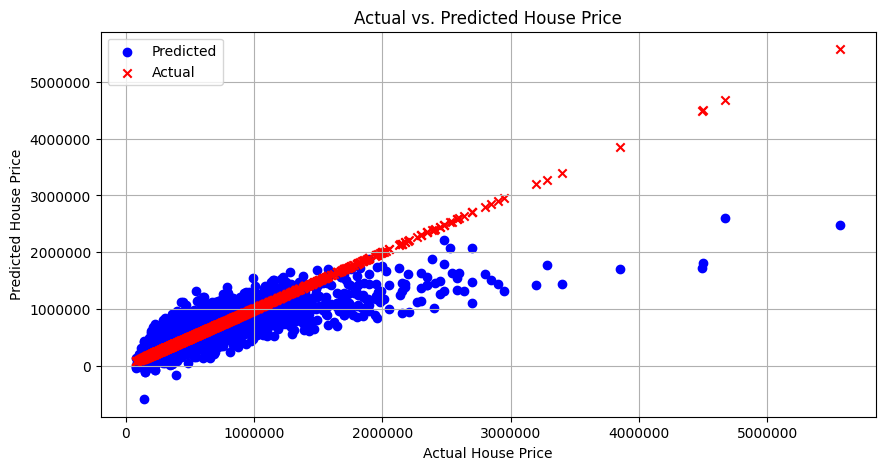

In [10]:
plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual', marker='x')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs. Predicted House Price')
plt.legend()

plt.grid(True)
plt.show()